In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')

In [3]:
import pickle

In [4]:
import omama as O # importing the Omama package


In [5]:
DATASET = 'B'
ALGORITHM = 'AE' # TODO





In [6]:
DATASET_C = {'A':0.08, 'B': 0.13, 'C': 0.24}

CONTAMINATION = DATASET_C[DATASET]

In [7]:
# load Dataset A
with open('/raid/mpsych/dataset'+DATASET+'.pkl', 'rb') as f:
    imgs = pickle.load(f)




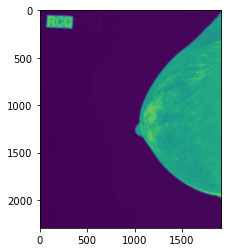

In [8]:
imshow(imgs[10].pixels)

In [9]:
# setup algorithm w/ best config w/ best feat w/ best norm
with open('/raid/mpsych/dataset'+DATASET+'_configs.pkl', 'rb') as f:
    configs = pickle.load(f)
    
CONFIG = configs[ALGORITHM]['config']
NORM = configs[ALGORITHM]['norm']
FEAT = configs[ALGORITHM]['feat']

CONFIG['verbose'] = True

In [10]:
NORM, FEAT

('max', 'sift')

In [11]:
CONFIG

{'contamination': 0.13,
 'verbose': True,
 'n_jobs': 1,
 'norm_type': 'max',
 'tol': 0.5,
 'n_bins': 2,
 'alpha': 0.08,
 'beta': 3,
 'n_neighbors': 3,
 'n_clusters': 2,
 'base_estimators': ['LOF', 'INNE', 'CBLOF', 'FB'],
 'cluster_estimator': 'KMeans',
 'n_estimators': 6,
 'subset_size': 0.5,
 'combination': 'maximum',
 'leaf_size': 30,
 'p': 2,
 'novelty': True,
 'kernel': 'rbf',
 'degree': 3,
 'gamma': 0.1,
 'coef0': 1,
 'nu': 0.5,
 'shrinking': True,
 'cache_size': 200,
 'max_iter': -1,
 'max_samples': 0.5,
 'bandwidth': 2.0,
 'radius': 1.0,
 'hidden_neurons': [24, 12, 12, 24]}

In [12]:
feature_vector = O.Features.get_features(imgs, FEAT, NORM)

In [13]:
train_scores, train_labels, accuracy = O.OutlierDetector.detect_outliers(features=feature_vector,
                                                imgs=imgs,
                                                pyod_algorithm=ALGORITHM,
                                                display=False,
                                                number_bad=int(CONTAMINATION*100),
                                                accuracy_score=True,
                                                **CONFIG)

Running AE...
In AE algorithm


2023-01-15 15:15:17.548652: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-15 15:15:18.957732: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-15 15:15:19.041815: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-15 15:15:19.041864: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-15 15:15:19.045166: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-15 15:15:19.045207: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                3

2023-01-15 15:15:19.053997: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 15:15:19.056940: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-15 15:15:19.062038: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-01-15 15:15:19.062071: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-15 15:15:19.531545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

Epoch 1/100


2023-01-15 15:15:20.851405: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


3/3 [==============================] - 2s 80ms/step - loss: 9.2301 - val_loss: 10.4036
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 7.4849 - val_loss: 8.7616
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 6.9064

2023-01-15 15:15:21.665393: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-01-15 15:15:21.665746: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 0s 13ms/step - loss: 6.2502 - val_loss: 7.5782
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 5.4590 - val_loss: 6.7376
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 4.9299 - val_loss: 6.1093
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 4.4869 - val_loss: 5.6397
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 4.1978 - val_loss: 5.2810
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 3.9899 - val_loss: 5.0060
Epoch 9/100
3/3 [==============================] - 0s 24ms/step - loss: 3.8313 - val_loss: 4.8004
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 3.6952 - val_loss: 4.6409
Epoch 11/100
3/3 [==============================] - 0s 12ms/step - loss: 3.6007 - val_loss: 4.5098
Epoch 12/100
3/3 [==============================] - 0s 13ms/step - loss: 3.5111 - val_loss: 4.4014
Epoch 13/100
3/3 [===========

Epoch 86/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4551 - val_loss: 2.2558
Epoch 87/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4548 - val_loss: 2.2475
Epoch 88/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4414 - val_loss: 2.2439
Epoch 89/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4643 - val_loss: 2.2379
Epoch 90/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4485 - val_loss: 2.2325
Epoch 91/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4425 - val_loss: 2.2296
Epoch 92/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4320 - val_loss: 2.2253
Epoch 93/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4208 - val_loss: 2.2241
Epoch 94/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4120 - val_loss: 2.2229
Epoch 95/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4159 - val_loss: 2.2202
Epoch 96/1

In [14]:
# store results
results = {'scores:': train_scores,
 'labels': train_labels,
 'accuracy': accuracy}



In [15]:
train_scores

array([ 5.3765006,  5.700533 ,  7.6999817, 20.55564  ,  4.216266 ,
        3.4003813,  3.4934886,  1.9666308,  3.7971582,  3.2994153,
        2.2250094,  4.94763  ,  2.7358177,  3.1476228,  2.5632825,
        2.723815 ,  3.1084297,  4.2678037,  5.743675 ,  5.275879 ,
        5.7607346,  3.1746116,  2.0943801,  3.6153514,  6.6214323,
        3.301689 , 20.551579 ,  3.6501606,  4.086243 ,  4.3209443,
        3.0297205, 18.603897 ,  3.294956 , 19.550076 ,  5.165837 ,
        4.0302606, 20.333012 ,  3.116079 ,  5.193648 ,  1.7952965,
        4.0773525,  7.7775826,  4.99632  ,  7.88181  ,  3.5463283,
        4.0641932,  2.7083447,  3.2664688,  3.7913325,  4.06284  ,
       19.461927 ,  2.095551 ,  3.8394418,  3.8603187,  3.167973 ,
        3.041227 ,  6.867558 ,  3.79611  ,  2.2863054,  4.4973645,
       21.31053  ,  5.088819 ,  3.109289 ,  2.9561486, 20.703236 ,
        4.4646487,  2.780326 ,  4.500168 , 15.917748 ,  7.75554  ,
        3.0523384,  3.6365576,  3.2050037,  3.2483156,  8.2960

In [16]:
train_labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [17]:
accuracy

0.23076923076923078

In [18]:
#./run.py COF  # this will run this code 10 times